In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing important files....
import io
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn import tree
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Dataset/combine dataset.xlsx')
df

,PATNO,EVENT_ID,NP1SLPN,NP1SLPD,NP1PAIN,NP1URIN,NP1CNST,NP1LTHD,NP1FATG,NP2SPCH,...,NP3PTRML,NP3KTRMR,NP3KTRML,NP3RTARU,NP3RTALU,NP3RTARL,NP3RTALL,NP3RTALJ,NP3RTCON,Status
0,3000.0,BL,1.0,2.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,3000.0,V04,0.0,2.0,0.0,1.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,3000.0,V06,2.0,1.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3000.0,V08,3.0,2.0,0.0,1.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,3000.0,V10,1.0,1.0,1.0,1.0,1,0,1,0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,NaN,NaN,2.0,2.0,2.0,0.0,0,0,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7142,NaN,NaN,4.0,2.0,3.0,1.0,1,1,3,3,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,3.0,1
7143,NaN,NaN,0.0,0.0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7144,NaN,NaN,0.0,0.0,1.0,0.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#feature_names = ['NP1SLPN', 'NP1SLPD','NP1PAIN','NP1URIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2SWAL','NP2EAT','NP2DRES','NP2HYGN','NP2HWRT','NP2HOBB','NP2TURN','NP2TRMR','NP2RISE','NP2WALK','NP2FREZ','NP3SPCH','NP3FACXP','NP3RIGN','NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL','NP3FTAPR','NP3FTAPL','NP3HMOVR','NP3HMOVL','NP3PRSPR','NP3PRSPL','NP3TTAPR','NP3TTAPL','NP3LGAGR','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3BRADY','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTALJ','NP3RTCON']

#Defining features(X) and labels(Y)....
X = df.drop(['Status','PATNO','EVENT_ID', 'NP1SLPN', 'NP1SLPD','NP1PAIN','NP1URIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2SWAL','NP2EAT','NP2DRES','NP2HYGN','NP2HOBB','NP2TURN','NP2RISE','NP2FREZ','NP3SPCH','NP3RIGN','NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL','NP3HMOVL','NP3TTAPR','NP3TTAPL','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTALU','NP3RTALL','NP3RTALJ'],axis =1).values
y = df['Status'].values

In [ ]:
#Checking is any nan value available or not
np.any(np.isnan(X))

True

In [ ]:
#Missing value handle
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
final_dataset = pd.DataFrame(X)
final_dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7141,3.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0
7142,3.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,3.0
7143,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature scaling
feature_X = StandardScaler().fit_transform(X)

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

Before OverSampling, counts of label '1': 5887
Before OverSampling, counts of label '0': 1259 



In [ ]:
#over sampling
sm = SMOTE(random_state = 2)
X_res, y_res = sm.fit_resample(feature_X, y.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (11774, 14)
After OverSampling, the shape of train_y: (11774,) 

After OverSampling, counts of label '1': 5887
After OverSampling, counts of label '0': 5887


In [ ]:
#Train and test data set split.....
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [ ]:
#Definimng SVM model
model_svm = SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#Fitting the defined model
model_svm.fit(X_train, y_train)

SVC(C=1000, gamma=0.1)

In [ ]:
#Prediction
y_pred = model_svm.predict(X_test)

In [ ]:
model_svm.score(X_train,y_train)

0.9960717698269456

In [ ]:
#Model score
model_svm.score(X_test,y_test)

0.9872611464968153

In [ ]:
X_test.shape

(2355, 14)

[[1187    4]
 [  26 1138]]


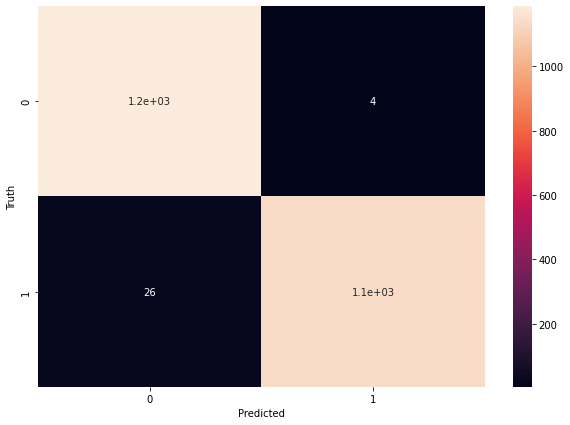

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
%matplotlib inline
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.savefig('accuracy.png')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.012738853503184714
MSE: 0.012738853503184714
RMSE: 0.11286652959662007


In [ ]:
#Precision,recall,f1_score,cohen_kappa_score,auc.......
print("Precision,recall,f1 score,cohen kappa score,auc.....")
print(" ")

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

# ROC AUC
auc = roc_auc_score(y_test,  y_pred)
print('ROC AUC: %f' % auc)
print(" ")

Precision,recall,f1 score,cohen kappa score,auc.....
 
Precision: 0.996497
Recall: 0.977663
F1 score: 0.986990
ROC AUC: 0.987152
 


Feature: 0, Score: 0.01970
Feature: 1, Score: 0.08756
Feature: 2, Score: 0.01567
Feature: 3, Score: 0.03788
Feature: 4, Score: 0.09448
Feature: 5, Score: 0.05125
Feature: 6, Score: 0.00977
Feature: 7, Score: 0.07461
Feature: 8, Score: 0.08127
Feature: 9, Score: 0.04909
Feature: 10, Score: 0.14064
Feature: 11, Score: 0.10093
Feature: 12, Score: 0.02756
Feature: 13, Score: 0.10268
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


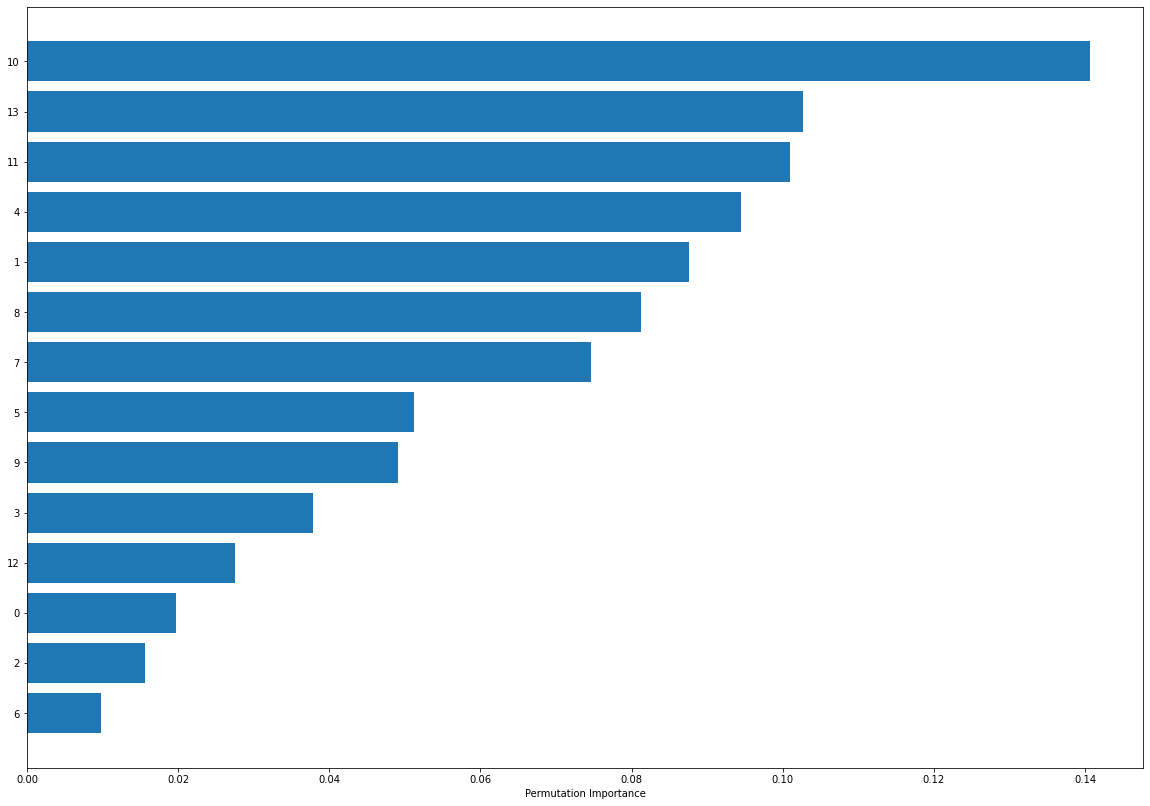

In [ ]:
%matplotlib inline

feature_names = ['NP1SLPN', 'NP1SLPD','NP1PAIN','NP1URIN','NP1CNST','NP1LTHD','NP1FATG','NP2SPCH','NP2SALV','NP2SWAL','NP2EAT','NP2DRES','NP2HYGN','NP2HWRT','NP2HOBB','NP2TURN','NP2TRMR','NP2RISE','NP2WALK','NP2FREZ','NP3SPCH','NP3FACXP','NP3RIGN','NP3RIGRU','NP3RIGLU','PN3RIGRL','NP3RIGLL','NP3FTAPR','NP3FTAPL','NP3HMOVR','NP3HMOVL','NP3PRSPR','NP3PRSPL','NP3TTAPR','NP3TTAPL','NP3LGAGR','NP3LGAGL','NP3RISNG','NP3GAIT','NP3FRZGT','NP3PSTBL','NP3POSTR','NP3BRADY','NP3PTRMR','NP3PTRML','NP3KTRMR','NP3KTRML','NP3RTARU','NP3RTALU','NP3RTARL','NP3RTALL','NP3RTALJ','NP3RTCON']


perm_importance = permutation_importance(model_svm, X_test, y_test, n_repeats=10,random_state=0)

features_names = ['0', '1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52']
features = np.array(features_names)

sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(20, 14))
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
imp=perm_importance.importances_mean
im=list()
for i,v in enumerate(imp):

	#if(v>=mean(perm_importance.importances_mean)):

	  print('Feature: %0d, Score: %.5f' % (i,v))
	  im.append(i)




#print('Threshold(Means of importances): %.5f' %mean(perm_importance.importances_mean))
print(im)

In [ ]:
import pickle
pickle.dump(model_svm, open("model_svm_last_1.pkl", "wb"))
# load the model
model = pickle.load(open("model_svm_last_1.pkl", "rb"))

In [ ]:
model.score(X_test, y_test)

0.9872611464968153

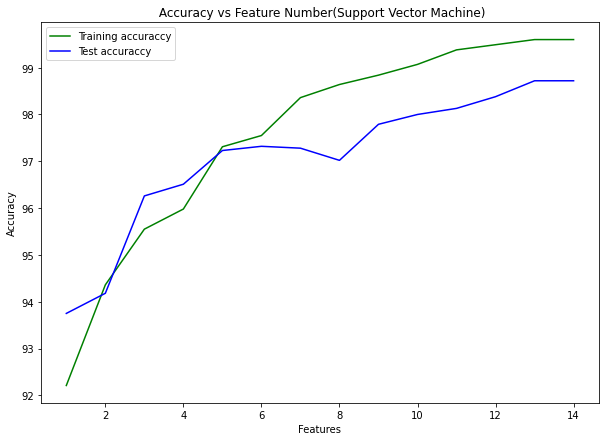

In [ ]:
train_accuracy =[92.21,94.36,95.55,95.98,97.31,97.55,98.36,98.64,98.84,99.07,99.38,99.49,99.60,99.60]
test_accuracy =[93.75,94.18,96.26,96.51,97.23,97.32,97.28,97.02,97.79,98.00,98.13,98.38,98.72,98.72]

features = range(1,15)
plt.figure(figsize=(10,7))
plt.plot(features, train_accuracy, 'g', label='Training accuraccy')
plt.plot(features, test_accuracy, 'b', label='Test accuraccy')
plt.title(' Accuracy vs Feature Number(Support Vector Machine)')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('SVM_accuraccy_vs_features.png')

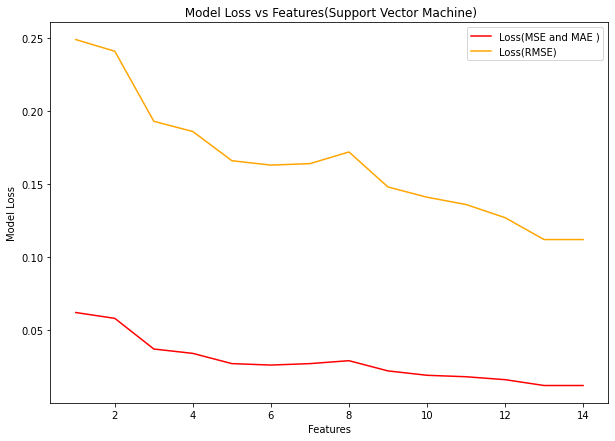

In [ ]:
MSE_loss =[0.062,0.058,0.037,0.034,0.027,0.026,0.027,0.029,0.022,0.019,0.018,0.016,0.012,0.012]
RMSE_loss =[0.249,0.241,0.193,0.186,0.166,0.163,0.164,0.172,0.148,0.141,0.136,0.127,0.112,0.112]

features = range(1,15)
plt.figure(figsize=(10,7))
plt.plot(features, MSE_loss, 'red', label='Loss(MSE and MAE )')
plt.plot(features,RMSE_loss, 'orange', label='Loss(RMSE)')
plt.title(' Model Loss vs Features(Support Vector Machine)')
plt.xlabel('Features')
plt.ylabel('Model Loss')
plt.legend()
plt.savefig('SVM_loss_vs_features.png')